In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

In [2]:
random_error = np.random.uniform(-1,1,100)
print(random_error) #is not run again to save this as the error we are working with

[-0.3486884   0.36621363  0.86489165 -0.64761341 -0.31303703  0.29324965
 -0.48353255 -0.8567221  -0.08509262  0.23914896 -0.3437969  -0.08462223
 -0.2670462   0.16784934 -0.32000557  0.06101394 -0.00312914  0.6727792
 -0.22103643 -0.07164484  0.96774639 -0.88899917 -0.26280014  0.00294241
 -0.79165774  0.10758522 -0.86532841  0.30914385  0.25047636  0.85646637
 -0.08689589  0.24850858 -0.78095538  0.24940261 -0.01248607 -0.12867893
 -0.00934671  0.31835256 -0.35649734 -0.07718773  0.79120933 -0.12502927
  0.21560455  0.08841941  0.58304073  0.45912188 -0.13410758 -0.07916797
  0.63550637 -0.84534176 -0.88579174 -0.80964911 -0.59083705 -0.22085371
 -0.18818547 -0.46189194 -0.7183905   0.37266463  0.79857855  0.44913889
  0.45831788  0.82771271 -0.83179458 -0.70457848  0.24223905  0.94455342
 -0.27547974  0.2733157  -0.171164    0.98445102 -0.82115081 -0.88423274
 -0.76222618  0.2425918   0.40252727 -0.29830281  0.03813571  0.68367929
  0.22434012 -0.48178125 -0.39547498 -0.5839698   0.

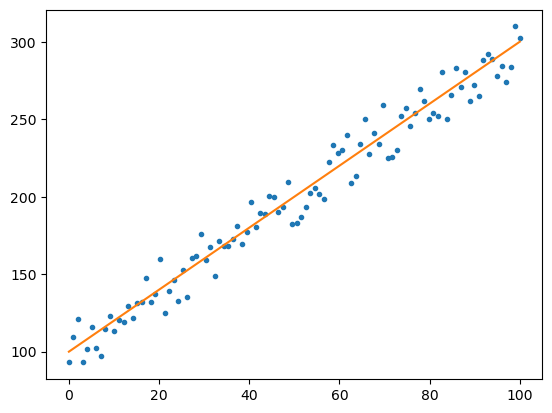

[ -6.97376792   7.32427256  17.29783304 -12.95226824  -6.26074061
   5.86499307  -9.67065106 -17.13444191  -1.70185243   4.78297928
  -6.87593803  -1.69244467  -5.34092402   3.35698671  -6.40011134
   1.2202788   -0.06258286  13.45558391  -4.42072863  -1.43289686
  19.35492775 -17.77998332  -5.25600271   0.0588481  -15.83315484
   2.15170446 -17.30656825   6.18287708   5.00952727  17.12932734
  -1.73791779   4.97017168 -15.6191077    4.98805218  -0.24972132
  -2.57357865  -0.18693421   6.36705124  -7.12994683  -1.5437546
  15.8241865   -2.50058546   4.31209095   1.76838819  11.66081458
   9.18243759  -2.68215166  -1.58335946  12.71012748 -16.90683515
 -17.71583477 -16.19298225 -11.81674104  -4.41707425  -3.76370949
  -9.23783889 -14.36780996   7.45329262  15.97157108   8.98277779
   9.16635756  16.55425427 -16.63589161 -14.09156961   4.84478098
  18.89106843  -5.5095947    5.46631402  -3.42328005  19.68902037
 -16.42301621 -17.68465486 -15.24452355   4.85183595   8.05054548
  -5.966056

In [3]:
#create data set for y = 3x + 2
def f(x):
    return 2*x + 100

def mse(y_predicted, y_actual) -> float:
    n = len(y_actual)
    print(y_predicted - y_actual)
    return (1/n)*np.sum((y_actual-y_predicted)**2)

x = np.linspace(0,100,100)
y = f(x) + random_error*20
plt.plot(x,y,'.')
plt.plot(x,f(x))
plt.show()

print(mse(y, f(x)))

def mse2(predictions, targets):
    # Retrieving number of samples in dataset
    samples_num = len(predictions)
   
    # Summing square differences between predicted and expected values
    accumulated_error = 0.0
    for prediction, target in zip(predictions, targets):
        accumulated_error += (prediction - target)**2
       
    # Calculating mean and dividing by 2
    mae_error = (1.0 / (2*samples_num)) * accumulated_error
   
    return mae_error

print(mse2(y, f(x)))

In [5]:
#attempt to do linear regression first
real_y = f(x)
y_actual = y

def g(x):
    return 3*x + 2

def rss(y_predicted, y_actual):
    return np.sum((y_actual-y_predicted)**2)

def tss(y_predicted, y_actual):
    y_ave = np.average(y_actual)
    return np.sum((y_predicted-y_ave)**2)

def pder_constant(x,b0,b1,y_actual): #vary b0
    y_predicted = predicted_linear_relation(x,b1,b0)
    const = (-2/len(y_actual)) * np.sum(y_actual - y_predicted)
    return const

def pder_grad(x,b0,b1,y_actual): #vary b1
    y_predicted = predicted_linear_relation(x,b1,b0)
    gradient = (-2/len(y_actual)) * np.sum((y_actual - y_predicted) * x)
    return gradient

def predicted_linear_relation(x,m,c): #expect x as np.array
    a = np.multiply(m,x) + c
    return a

def gradient_descent(m:float, c:float, grad1 : Callable[[float,int],float],
                    learn_rate, max_iter:int, x, tol: float = 0.04): #try removing callables first
    steps = [[],[]]
    # values = { 'm': [], 'c':[]}
    for _ in range(max_iter):
        diff1 = learn_rate * grad1(x,m,c,edited_y) #gradient
        # diff2 = learn_rate2 * grad2(x,m,c,edited_y) #constant
        # print("diff1: " + str(diff1))
        # print("diff2: " + str(diff2))
        # yp = predicted_linear_relation(x,m,c)
        # r2 = 1 - (rss(yp,y_actual)/tss(yp,y_actual))
        if np.abs(diff1) < tol:
            break
        # if r2 > 0.95:
        #     break
        # print(m, diff1, c, diff2, _, r2, sep = '\t')
        m-= diff1
        # c-= diff2
        # print("c: " + str(c))
        # steps[0].append(diff1)
        # steps[1].append(diff2)
        # plt.plot(x,yp)
    return m,c

initial_gradient = 5
initial_intercept = 6

new_x = np.array([1,2,3,4,5])
new_y = g(new_x)
print(new_y)
edited_y = new_y
edited_y[2] = 13
# print(edited_y)
# print('this is mse:', mse(new_y, edited_y))

# predicted_gradient, predicted_intercept, steps = gradient_descent(m=initial_gradient, c=initial_intercept, grad1 = pder_grad,
#                                                           grad2 = pder_constant, learn_rate1 = 1e-5, learn_rate2 = 1e-5, 
#                                                            max_iter = 1000, x=x)
# predicted_gradient, predicted_intercept, steps, values = gradient_descent(m=initial_gradient, c=initial_intercept, grad1 = pder_grad,
#                                                           grad2 = pder_constant, learn_rate1 = 1e-3, learn_rate2 = 5e-3, 
#                                                            max_iter = 1000, x=new_x)
runs = 0
r2 = 0
while r2 < 0.95 and runs<1000:
    m1, c1 = gradient_descent(m = initial_gradient, c = initial_intercept, grad1 = pder_grad, learn_rate = 1e-4,
                                    max_iter = 1000, x = new_x)
    y_predicted = predicted_linear_relation(new_x,m1,c1)
    r2 = 1 - (rss(y_predicted, edited_y)/tss(y_predicted, edited_y))
    
    if r2 > 0.95:
        break
    
    m2, c2 = gradient_descent(m = initial_intercept, c = initial_gradient, grad1 = pder_constant, learn_rate = 1e-4,
                                    max_iter = 1000, x= new_x)
    
    y_predicted = predicted_linear_relation(new_x,m2,c2)
    r2 = 1 - (rss(y_predicted, edited_y)/tss(y_predicted, edited_y))
    
    initial_gradient, initial_intercept = m1, c2
    runs+=1
    print(runs, m1, c1, m2, c2, sep = '\t')

y_predicted = predicted_linear_relation(x,predicted_gradient,predicted_intercept)
r2 = 1 - (rss(y_predicted, y)/tss(y_predicted, y))
print(r2)

print(predicted_gradient, predicted_intercept)

plt.plot(new_x,edited_y,'.')
plt.plot(new_x,predicted_linear_relation(new_x,predicted_gradient,predicted_intercept),linestyle='solid',color='r', label='predicted')
plt.plot(new_x,new_y, color = 'g', label='actual')
plt.ylim(0,20)

plt.legend(loc='upper right')
plt.show()

# plt.plot(np.arange(len(steps[0])),steps[0], label='diff1')
# # plt.plot(np.arange(len(steps[1])),steps[1], label='diff2')
# plt.legend(loc='lower left')
# gradientgraph = pder_grad(np.arange(0,100),3,2,y_actual)
# plt.plot(np.arange(0,100), gradientgraph)

[ 5  8 11 14 17]
1	5	6	6	5
2	5	5	5	5
3	5	5	5	5
4	5	5	5	5
5	5	5	5	5
6	5	5	5	5
7	5	5	5	5
8	5	5	5	5
9	5	5	5	5
10	5	5	5	5
11	5	5	5	5
12	5	5	5	5
13	5	5	5	5
14	5	5	5	5
15	5	5	5	5
16	5	5	5	5
17	5	5	5	5
18	5	5	5	5
19	5	5	5	5
20	5	5	5	5
21	5	5	5	5
22	5	5	5	5
23	5	5	5	5
24	5	5	5	5
25	5	5	5	5
26	5	5	5	5
27	5	5	5	5
28	5	5	5	5
29	5	5	5	5
30	5	5	5	5
31	5	5	5	5
32	5	5	5	5
33	5	5	5	5
34	5	5	5	5
35	5	5	5	5
36	5	5	5	5
37	5	5	5	5
38	5	5	5	5
39	5	5	5	5
40	5	5	5	5
41	5	5	5	5
42	5	5	5	5
43	5	5	5	5
44	5	5	5	5
45	5	5	5	5
46	5	5	5	5
47	5	5	5	5
48	5	5	5	5
49	5	5	5	5
50	5	5	5	5
51	5	5	5	5
52	5	5	5	5
53	5	5	5	5
54	5	5	5	5
55	5	5	5	5
56	5	5	5	5
57	5	5	5	5
58	5	5	5	5
59	5	5	5	5
60	5	5	5	5
61	5	5	5	5
62	5	5	5	5
63	5	5	5	5
64	5	5	5	5
65	5	5	5	5
66	5	5	5	5
67	5	5	5	5
68	5	5	5	5
69	5	5	5	5
70	5	5	5	5
71	5	5	5	5
72	5	5	5	5
73	5	5	5	5
74	5	5	5	5
75	5	5	5	5
76	5	5	5	5
77	5	5	5	5
78	5	5	5	5
79	5	5	5	5
80	5	5	5	5
81	5	5	5	5
82	5	5	5	5
83	5	5	5	5
84	5	5	5	5
85	5	5	5	5
86	5	5	5	5
87	5	5	5	5
88	5	5	5	5
89	5	5	5	5
90	5	5	5	5
91

NameError: name 'predicted_gradient' is not defined

In [ ]:
m = 1.5
c = 98

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(x)) # Number of elements in X
Y = y

def pder_constant(x,b0,b1,y_actual): #vary b0
    y_predicted = predicted_linear_relation(x,b1,b0)
    const = (-2/len(y_actual)) * np.sum(y_actual - y_predicted)
    return const

def pder_grad(x,b0,b1,y_actual): #vary b1
    y_predicted = predicted_linear_relation(x,b1,b0)
    gradient = (-2/len(y_actual)) * np.sum((y_actual - y_predicted) * x)
    return gradient


# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*x + c  # The current predicted value of Y
    D_m = (-2/n) * sum(x * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

Y_pred = m*x + c

plt.scatter(x, Y) 
plt.plot([min(x), max(x)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()